To-do:
- Make sure all libraries in for 3D -> 1D pharmacophore graph
- As in matrix calculations
- Network X

In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolAlign
from rdkit.Chem.Draw import MolsToGridImage
from pharmacophore import Pharmacophore, Draw, View

import numpy as np
import pandas as pd
import networkx as nx



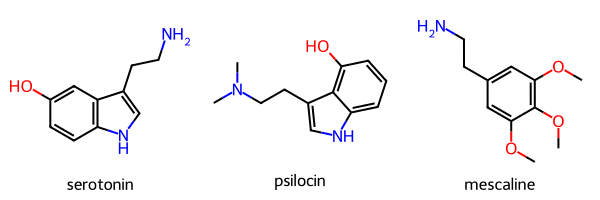

In [34]:
molecules = {"serotonin": "C1=CC2=C(C=C1O)C(=CN2)CCN",
             "psilocin": "CN(C)CCc1c[nH]c2cccc(O)c12",
             "mescaline": "O(c1cc(cc(OC)c1OC)CCN)C"}

mol_smi = [smi for smi in molecules.values()]
mol_name = [name for name in molecules.keys()]
mols = [Chem.MolFromSmiles(smi) for smi in mol_smi]

MolsToGridImage(mols=mols, legends=mol_name)

In [35]:
mols = [Chem.AddHs(mol) for mol in mols]
ps = AllChem.ETKDGv3()
ps.randomSeed = 5
for mol in mols:
    AllChem.EmbedMolecule(mol, ps)

In [36]:
aligned = []

for mol in mols:
    mol_aligned = rdMolAlign.GetO3A(mol, mols[0])
    aligned.append(mol_aligned.Align())

In [37]:
# conformations stored as sdf files
# this is step 1
for mol, name in zip(mols, mol_name):
    w = Chem.SDWriter(f"data/{name}.sdf")
    w.write(mol)
    w.close()

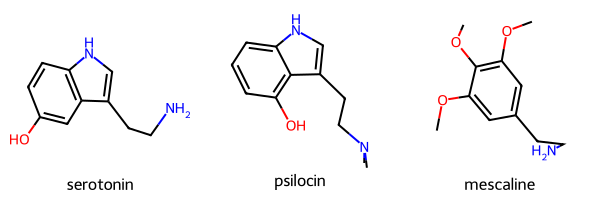

In [38]:
mols_noH = [Chem.RemoveHs(mol) for mol in mols]
MolsToGridImage(mols=mols_noH, legends=mol_name)

In [39]:
# test default and rdkit pharmacophore features: "default" and "rdkit"
PHARM_FEATURES = "rdkit"
pharm = Pharmacophore(features=PHARM_FEATURES)

# can test this also -- presence/absence of pharmacophore features
# simply binarized
df = pharm.to_df(mols_noH, mol_name=mol_name)
df

,serotonin,psilocin,mescaline
Donor,3,3,1
Acceptor,1,1,3
PosIonizable,1,1,1
Aromatic,2,2,1
Hydrophobe,3,3,2
LumpedHydrophobe,1,1,1


In [ ]:
pharma_single = pharm.calc_pharm(mols_noH[2])

def condense_features(pharma):
    pharma_arr = np.array(pharma, dtype=object)
    condensed_pharma = []
    atom_index = pharma_arr[:, 1]
    grouped = pd.Series(range(len(atom_index))).groupby(atom_index, sort=False).apply(list).tolist()
        
    for group in grouped:
        features = pharma_arr[group, 0]
        x_coords = pharma_arr[group, 2].astype(float)[0]
        y_coords = pharma_arr[group, 3].astype(float)[0]
        z_coords = pharma_arr[group, 4].astype(float)[0]
        condensed_pharma.append([features, atom_index[group[0]], x_coords, y_coords, z_coords])
    
    return condensed_pharma


print(pharma_single)  
condense_features(pharma_single)

[['Donor', (13,), 2.0426386937709027, -1.4890329715475348, 1.2092550398315267], ['Acceptor', (0,), -2.615830241341224, 0.6586622081819367, 1.0866276156009447], ['Acceptor', (6,), 0.13188702996256887, 3.6113934629348177, -1.462378832925321], ['Acceptor', (9,), -2.0430474328930806, 3.1384109158366926, 0.08637058860151152], ['PosIonizable', (13,), 2.0426386937709027, -1.4890329715475348, 1.2092550398315267], ['Aromatic', (1, 2, 3, 4, 5, 8), -0.3533744411373463, 1.057197650843848, -0.5009222488126747], ['Hydrophobe', (3,), 0.5069691906472905, 0.009457785519939033, -0.8029736983090402], ['Hydrophobe', (11,), 1.4349337934966897, -1.1022766493840264, -1.1334201613604429], ['LumpedHydrophobe', (1, 2, 3, 4, 5, 8), -0.3533744411373463, 1.057197650843848, -0.5009222488126747]]


[[array(['Donor', 'PosIonizable'], dtype=object),
  (13,),
  np.float64(2.0426386937709027),
  np.float64(-1.4890329715475348),
  np.float64(1.2092550398315267)],
 [array(['Acceptor'], dtype=object),
  (0,),
  np.float64(-2.615830241341224),
  np.float64(0.6586622081819367),
  np.float64(1.0866276156009447)],
 [array(['Acceptor'], dtype=object),
  (6,),
  np.float64(0.13188702996256887),
  np.float64(3.6113934629348177),
  np.float64(-1.462378832925321)],
 [array(['Acceptor'], dtype=object),
  (9,),
  np.float64(-2.0430474328930806),
  np.float64(3.1384109158366926),
  np.float64(0.08637058860151152)],
 [array(['Aromatic', 'LumpedHydrophobe'], dtype=object),
  (1, 2, 3, 4, 5, 8),
  np.float64(-0.3533744411373463),
  np.float64(1.057197650843848),
  np.float64(-0.5009222488126747)],
 [array(['Hydrophobe'], dtype=object),
  (3,),
  np.float64(0.5069691906472905),
  np.float64(0.009457785519939033),
  np.float64(-0.8029736983090402)],
 [array(['Hydrophobe'], dtype=object),
  (11,),
  np.f

In [ ]:
v=View()
pharma = []
for mol in mols_noH:
    pharma.append(pharm.calc_pharm(mol))
v.view(mols_noH, pharma, labels=True)

# next is networkx of flat pharmacophore

interactive(children=(Dropdown(description='Select:', options=(('Molecule 1', 0), ('Molecule 2', 1), ('Molecul…

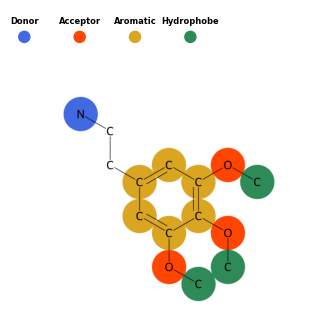

In [20]:
draw = Draw()
draw.draw_pharm(mols_noH[2])